<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
#load_boston
#- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 

from sklearn.datasets import load_boston
Boston = load_boston()

In [2]:
X = Boston.data
Y = Boston.target 
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [3]:
#normalized mean used preprocessing class from sklearn then use the normalize function.
from sklearn import preprocessing
#normalized refer to rescaling real valued numeric attributes into 0 and 1.
#
normalized_x = preprocessing.normalize(X)
normalized_x

array([[1.26388341e-05, 3.59966795e-02, 4.61957387e-03, ...,
        3.05971776e-02, 7.93726783e-01, 9.95908132e-03],
       [5.78529889e-05, 0.00000000e+00, 1.49769546e-02, ...,
        3.77071843e-02, 8.40785474e-01, 1.93620036e-02],
       [5.85729947e-05, 0.00000000e+00, 1.51744622e-02, ...,
        3.82044450e-02, 8.43137761e-01, 8.64965806e-03],
       ...,
       [1.23765824e-04, 0.00000000e+00, 2.43009593e-02, ...,
        4.27762066e-02, 8.08470305e-01, 1.14884669e-02],
       [2.24644719e-04, 0.00000000e+00, 2.44548909e-02, ...,
        4.30471676e-02, 8.06519433e-01, 1.32831260e-02],
       [9.69214289e-05, 0.00000000e+00, 2.43887924e-02, ...,
        4.29308164e-02, 8.11392431e-01, 1.61092778e-02]])

In [4]:
# Import the type of model and layers that you will need from Keras.
#- Instantiate a model object and use `model.add()` to add layers to your model
#- Use activation functions that are appropriate for this task

from keras.models import Sequential
from keras.layers import Dense
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, \
                    kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

Using TensorFlow backend.


In [5]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import numpy

seed = 7
numpy.random.seed(seed)
#- Since this is a regression model you will have a single output node in the final layer.
estimator = KerasRegressor(build_fn=baseline_model, epochs=10,batch_size=5, verbose=0)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)

In [6]:
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal')) 
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
506/506 [==============================] - 1s 2ms/step - loss: 266.7740
Epoch 2/150
506/506 [==============================] - 0s 206us/step - loss: 108.6745
Epoch 3/150
506/506 [==============================] - 0s 209us/step - loss: 78.9845
Epoch 4/150
506/506 [==============================] - 0s 208us/step - loss: 70.8852
Epoch 5/150
506/506 [==============================] - 0s 212us/step - loss: 65.8467
Epoch 6/150
506/506 [==============================] - 0s 268us/step - loss: 63.6887
Epoch 7/150
506/506 [==============================] - 0s 222us/step - loss: 61.3821
Epoch 8/150
506/506 [==============================] - 0s 207us/step - loss: 60.3063
Epoch 9/150
506/506 [==============================] - 0s 207us/step - loss: 59.2684
Epoch 10/150
506/506 [==============================] - 0s 218us/step - loss: 56.9353
Epoch 11/150
506/506 [==============================] - 0s 218us/step - loss: 55.7252
Epoch 12/150
506/506 [==============================] - 0s 207u

506/506 [==============================] - 0s 210us/step - loss: 21.8041
Epoch 97/150
506/506 [==============================] - 0s 216us/step - loss: 21.8827
Epoch 98/150
506/506 [==============================] - 0s 218us/step - loss: 21.5620
Epoch 99/150
506/506 [==============================] - 0s 218us/step - loss: 22.2887
Epoch 100/150
506/506 [==============================] - 0s 211us/step - loss: 21.9266
Epoch 101/150
506/506 [==============================] - 0s 211us/step - loss: 21.4985
Epoch 102/150
506/506 [==============================] - 0s 219us/step - loss: 21.2514
Epoch 103/150
506/506 [==============================] - 0s 210us/step - loss: 20.8286
Epoch 104/150
506/506 [==============================] - 0s 209us/step - loss: 21.1448
Epoch 105/150
506/506 [==============================] - 0s 212us/step - loss: 20.3371
Epoch 106/150
506/506 [==============================] - 0s 217us/step - loss: 20.7750
Epoch 107/150
506/506 [==============================] - 0s 

In [7]:
#- Compile your model
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])


In [10]:
#- Fit your model and report its accuracy in terms of Mean Squared Error
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)


In [12]:

#- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
#ne of the default callbacks that is registered when training all deep learning models is the History callback.
#It records training metrics for each epoch. 
#This includes the loss and the accuracy (for classification problems) as well as the loss and accuracy
#for the validation dataset, if one is set.
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
import matplotlib.pyplot as plt

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


KeyError: 'accuracy'

In [ ]:
#- Run this same data through a linear regression model. Which achieves higher accuracy?


In [ ]:
#-- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)


In [ ]:
#- After feature engineering, which model sees a greater accuracy boost due to the new features?

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [13]:
##### Your Code Here #####
# import library and import images
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [15]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [16]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
60000/60000 [==============================] - 37s 616us/step - loss: 0.6393 - acc: 0.8063
Epoch 2/10
60000/60000 [==============================] - 36s 595us/step - loss: 0.2474 - acc: 0.9257
Epoch 3/10
60000/60000 [==============================] - 36s 599us/step - loss: 0.1846 - acc: 0.9443
Epoch 4/10
60000/60000 [==============================] - 36s 594us/step - loss: 0.1536 - acc: 0.9548
Epoch 5/10
60000/60000 [==============================] - 37s 624us/step - loss: 0.1348 - acc: 0.9593
Epoch 6/10
60000/60000 [==============================] - 35s 588us/step - loss: 0.1193 - acc: 0.9632
Epoch 7/10
60000/60000 [==============================] - 35s 590us/step - loss: 0.1068 - acc: 0.9671
Epoch 8/10
60000/60000 [==============================] - 35s 584us/step - loss: 0.0991 - acc: 0.9701
Epoch 9/10
60000/60000 [==============================] - 35s 588us/step - loss: 0.0918 - 

In [18]:
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 2s 233us/step


[0.07340203110827133, 0.9775]

NameError: name 'img_rows' is not defined

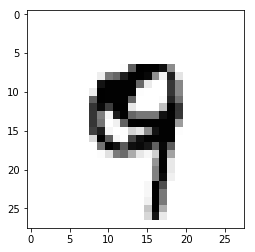

In [19]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.